Kenan Stredic

[*********************100%%**********************]  1 of 1 completed


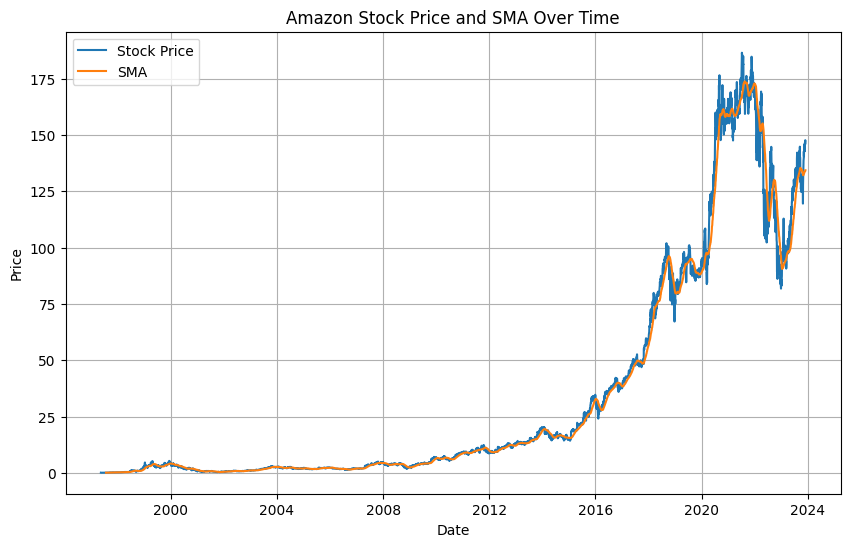

Buy and Hold - Total Equity at the end of 30 years: 6681102.554441427
Buy and Hold - Annual Percent Return: 0.1974504810147819
Active Trading - Total Equity at the end of 30 years: 240031.39169792944
Active Trading - Annual Percent Return: 0.07177813512823272


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical stock price data for Amazon from Yahoo Finance
ticker = 'AMZN'
data = yf.download(ticker, start='1990-01-01', end='2023-11-30')

# Calculate Simple Moving Average (SMA) over a certain window
n = 50  # Adjust this window size as needed
data['SMA'] = data['Close'].rolling(window=n).mean()

# Initialize variables for tracking investments and equity
investment_amount = 1000
savings_account = 0
stock_holdings = 0
buy_and_hold_equity = 0

# Iterate through the data
for index, row in data.iterrows():
    # Implement Buy and Hold strategy
    buy_and_hold_equity += investment_amount
    # For Active Trading strategy based on SMA crossover
    if row['Close'] > row['SMA']:
        if stock_holdings == 0:  # Buy signal
            stock_holdings += investment_amount / row['Close']
            savings_account -= investment_amount
    else:
        if stock_holdings > 0:  # Sell signal
            savings_account += stock_holdings * row['Close']
            stock_holdings = 0
            savings_account += investment_amount

# Calculate total equity at the end of 30 years for both strategies
buy_and_hold_total_equity = buy_and_hold_equity + (stock_holdings * data.iloc[-1]['Close'])
active_trading_total_equity = savings_account + (stock_holdings * data.iloc[-1]['Close'])

# Calculate annual percent return
years = 30
buy_and_hold_annual_return = ((buy_and_hold_total_equity) / (investment_amount * years)) ** (1 / years) - 1
active_trading_annual_return = ((active_trading_total_equity) / (investment_amount * years)) ** (1 / years) - 1

# Plotting the growth of both strategies
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Stock Price')
plt.plot(data.index, data['SMA'], label='SMA')
plt.title('Amazon Stock Price and SMA Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Output the metrics
print("Buy and Hold - Total Equity at the end of 30 years:", buy_and_hold_total_equity)
print("Buy and Hold - Annual Percent Return:", buy_and_hold_annual_return)
print("Active Trading - Total Equity at the end of 30 years:", active_trading_total_equity)
print("Active Trading - Annual Percent Return:", active_trading_annual_return)
